In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
fatal: early EOF
fatal: the remote end hung up unexpectedly
fatal: unpack-objects failed
error: RPC failed; curl 92 HTTP/2 stream 0 was not closed cleanly: INTERNAL_ERROR (err 2)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle as pkl

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
np.random.seed(0)

In [4]:
!ls german-traffic-signs

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pkl.load(f)
  
with open('german-traffic-signs/test.p','rb') as f:
  test_data = pkl.load(f)
  
with open('german-traffic-signs/valid.p','rb') as f:
  val_data = pkl.load(f)
  
X_train,y_train = train_data['features'],train_data['labels']
X_test,y_test = test_data['features'],test_data['labels']
X_val,y_val = val_data['features'],val_data['labels']

FileNotFoundError: [Errno 2] No such file or directory: 'german-traffic-signs/train.p'

In [ ]:
import pandas as pd
import random

data = pd.read_csv('german-traffic-signs/signnames.csv')

In [ ]:
num_of_samples=[]
 
cols = 5
num_classes = 43
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(50,50))
fig.tight_layout()

for i in range(cols):
    for j,raw in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j)+'-'+raw['SignName'])
        num_of_samples.append(len(x_selected))

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:

import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

In [ ]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

In [ ]:
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [ ]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

In [ ]:
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [ ]:
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [ ]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

In [ ]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
datagen.fit(X_train)

In [ ]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
y_val = to_categorical(y_val,43)

In [ ]:
def lenet():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(32, 32, 1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.01),loss = 'categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
lnet = lenet()

In [ ]:
lnet.summary()

In [ ]:
history=lnet.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val),batch_size=400,verbose=1,shuffle=1)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
score = lnet.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60,(5,5),input_shape=(32, 32, 1),activation='relu'))
  model.add(Conv2D(60,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
 
  
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.001),loss = 'categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model = modified_model()
his =model.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val),batch_size=400,verbose=1,shuffle=1)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
plt.plot(his.history['acc'])
plt.plot(his.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
img = img.reshape(1, 32, 32, 1)
print("predicted sign: "+ str(model.predict_classes(img)))

In [0]:
def model():
  model = Sequential()
  model.add(Conv2D(60,(5,5),input_shape=(32, 32, 1),activation='relu'))
  model.add(Conv2D(60,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
 
  
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
 # model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.001),loss = 'categorical_crossentropy',metrics=['accuracy'])
  return model

In [0]:
model = model()
summ =model.fit_generator(datagen.flow(X_train,y_train,batch_size=50),steps_per_epoch=2000, epochs=10,validation_data=(X_val,y_val),verbose=1,shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.8794 - acc: 0.7417 - val_loss: 0.1306 - val_acc: 0.9615
Epoch 2/10
2000/2000 [==============================] - 51s 25ms/step - loss: 0.2245 - acc: 0.9301 - val_loss: 0.0439 - val_acc: 0.9857
Epoch 3/10
2000/2000 [==============================] - 51s 26ms/step - loss: 0.1476 - acc: 0.9541 - val_loss: 0.0323 - val_acc: 0.9900
Epoch 4/10
2000/2000 [==============================] - 51s 26ms/step - loss: 0.1190 - acc: 0.9635 - val_loss: 0.0456 - val_acc: 0.9891
Epoch 5/10
2000/2000 [==============================] - 51s 26ms/step - loss: 0.0966 - acc: 0.9705 - val_loss: 0.0398 - val_acc: 0.9880
Epoch 6/10
2000/2000 [==============================] - 51s 25ms/step - loss: 0.0870 - acc: 0.9734 - val_loss: 0.0397 - val_acc: 0.9871
Epoch 7/10
2000/2000 [==============================] - 52s 26ms/step - loss: 0.0767 - acc: 0.9775 - val_loss: 0.0416 - val_acc: 0.9866
Epoch 8/10
2000/2000 [==========================

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.12412373612280202
Test accuracy: 0.9763262074614741


Text(0.5, 0, 'epoch')

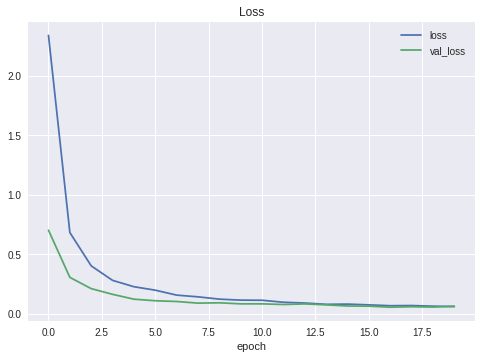

In [0]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

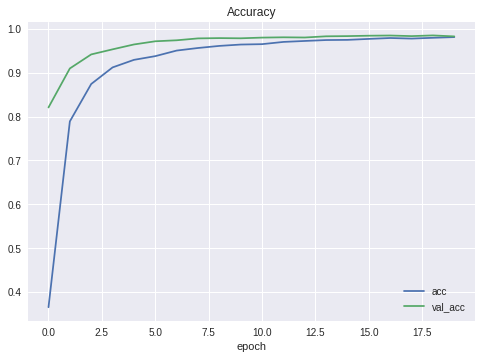

In [0]:
plt.plot(his.history['acc'])
plt.plot(his.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [0]:
import requests
from PIL import Image
url = ['https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg', 
       'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg',
       'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg',
       'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg',
       'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg']
for i in url:
  r = requests.get(i, stream=True)
  img = Image.open(r.raw)
  plt.imshow(img, cmap=plt.get_cmap('gray'))
  plt.close()
  
  img = np.asarray(img)
  img = cv2.resize(img, (32, 32))
  img = preprocess(img)
  plt.imshow(img, cmap = plt.get_cmap('gray'))
  plt.close()
  print(img.shape)
  img = img.reshape(1, 32, 32, 1)
  print("predicted sign: "+ str(model.predict_classes(img)))

(32, 32)
predicted sign: [12]
(32, 32)
predicted sign: [1]
(32, 32)
predicted sign: [23]
(32, 32)
predicted sign: [13]
(32, 32)
predicted sign: [29]
